# Project 5
**Author:** Tommy Phung <br>
Target: Video Game Invenstors

In [1]:
import pandas as pd
from functions import data_cleaning as dc 

In [2]:
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)
goty_df = pd.read_excel('datasets/Sample GOTY.xlsx')
ranked_df = pd.read_csv('datasets/vgsales.csv')

## Data Preperations

Before analysising the dataset, it needs to be cleaned for any missing data or any data that isn't needed for the project. <br>
Unnecessary columns are removed from the dataset that would not be used. **Wishlist, Playing and Backlog** are the number of people that want the game, is currently playing or planning on playing the selected game. This is subjective and doesn't indicate whether the game is good or bad. The column Plays, which are people that have played the game can give insight on actual players for the game. <br>

**TBD or To Be Determined** are games with not release date yet meaning that the game is too new to be analysis yet. 
Any duplicates are also removed. A thing to note is that games get rereleases so duplicates in titles are handled differently. 

The number of players in the columns **Plays and Reviews** are changed to integers for comparison. The letter **K**, stands for the thousands and changed accordingly. 

Lastly, if the games made over a million or 1 in sales, the corresding game would recieve a 1 for being true or 0 if they were not able to achieve the benchmark. 

In [4]:
df.drop(['Wishlist', 'Backlogs','Playing', 'Lists'], axis = 1, inplace= True)    ### Not needed columns
df.drop(df[df['Release_Date'] == 'TBD'].index, inplace= True)   ### Unfair 
df.drop_duplicates(inplace= True)    ### Drop any duplicates

df['Plays'] = df['Plays'].apply(dc.value_to_float)   ### Convert K into 1000s
df['Reviews'] = df['Reviews'].apply(dc.value_to_float)   ### Convert K into 1000s

df.Release_Date = df.Release_Date.apply(lambda x: int(x[-4:]))    ### Convert the year released to just the year. 

df.drop(df[df.Rating.isna()].index, inplace= True)    ### If the game doesn't have a rating, drop it. 
df.reset_index(drop= True, inplace= True)

In [3]:
### Add a new column with all 0. 
df['Over_1'] = 0
df.loc[df['Title'].isin(ranked_df[ranked_df.Global_Sales >= 1].Name.values), 'Over_1'] = 1

## Data Distribution

While looking at the dataset, there is a couple of things to note in the distribution. For the number of ratings, it follows a normal distribution not including that the number of games that doesn't have a rating. 

**16.6 %** of the games were a developers **single game**. This could be misleading as some **developers changes names** or get **absorbed by companies** that would change what the game developers havppens to be. We would assume that this doesn't make a majority of games for now unless the number of games makes an impact. <br>
**15.1 %** of the games **doesn't have a game developer listed**. There is a number of reason other than missing developer name. **Newer unknown games** would have individual name rather than actual company name. This could be good to note the potential of these games since **not all good games are known or created by big companies.** 


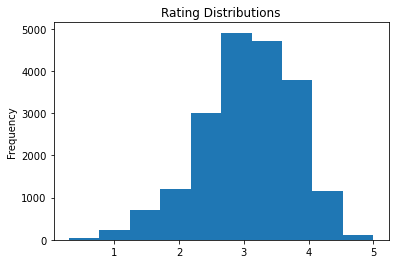

In [5]:
### Rating Distrbution 
df[df.Rating >= 0].Rating.plot(kind = 'hist', title = 'Rating Distributions', xlabel = 'Rating', sharex = False);

In [6]:
df.Genres = df.Genres.apply(dc.convert_to_list)
df.Developers = df.Developers.apply(dc.convert_to_list)

In [7]:
dev_df = pd.concat([df.Title, pd.get_dummies(df['Developers'].explode(),drop_first= True).groupby(level=0).sum(), df[['Over_1']]], axis= 1)
genre_df = pd.concat([df.Title, pd.get_dummies(df['Genres'].explode(),drop_first= True).groupby(level=0).sum(), df[['Over_1']]], axis= 1)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = genre_df[genre_df.columns[1:-1]]
y =  genre_df.Over_1
X_train, X_test, y_train, y_test = train_test_split(X, y,)
                                                            
classifier = DecisionTreeClassifier(random_state=10)  

classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [9]:
classifier.score(X_test, y_test)

0.9329575196295551

In [44]:
feature_list = []
for name, value in zip(classifier.feature_names_in_, classifier.feature_importances_):
    feature_list.append((name, round(value*100, 2)))
feature_list = dict(sorted(feature_list, key= lambda x: x[1], reverse= False))

dict_keys(['Indie', 'Adventure', 'Sport', 'RPG', 'Racing', 'Puzzle', 'Strategy', 'Arcade', 'Brawler', 'Platform', 'Simulator', 'Shooter', 'Tactical', 'Quiz/Trivia', 'Fighting', 'Turn Based Strategy', 'Real Time Strategy', 'Music', 'Point-and-Click', 'Visual Novel', 'Card & Board Game', 'Pinball', 'MOBA'])

In [11]:
test_df = pd.concat([X_test.reset_index(), pd.Series(classifier.predict(X_test), name = 'Pred')], axis= 1)

In [12]:
test_df.loc[test_df['Pred'] == 1]

,index,Adventure,Arcade,Brawler,Card & Board Game,Fighting,Indie,MOBA,Music,Pinball,...,Racing,Real Time Strategy,Shooter,Simulator,Sport,Strategy,Tactical,Turn Based Strategy,Visual Novel,Pred
49,1000,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
109,3456,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
158,1170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
642,1780,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
696,18779,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
829,1926,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1159,11767,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1197,7056,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2015,3873,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2163,6099,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [13]:
df.iloc[test_df.loc[test_df['Pred'] == 1]['index'].values]

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Reviews,Over_1
1000,Phoenix Wright: Ace Attorney - Dual Destinies,2013,[Capcom],Dual Destinies continues the style of gameplay...,"['Android', 'iOS', 'Nintendo 3DS']","[Adventure, Puzzle, RPG, Simulator, Visual Novel]",3.4,3700.0,0.0,0
3456,Dota Underlords,2019,[Valve],"In Dota Underlords, strategic decisions matter...","['Windows PC', 'Android', 'Mac', 'Linux', 'iOS']","[Card & Board Game, RPG, Strategy, Tactical]",2.5,0.0,0.0,0
1170,Professor Layton and the Diabolical Box,2007,"[Nintendo, LEVEL-5]","Professor Layton may be a world-famous sleuth,...","['Nintendo DS', 'Mobile']","[Point-and-Click, Puzzle, Visual Novel]",3.9,2900.0,0.0,1
1780,Yakuza 4,2010,"[Ryu ga Gotoku Studios, Sega]",Yakuza 4 is the fourth game in Sega's crime dr...,['PlayStation 3'],"[Adventure, Brawler, RPG, Simulator, Sport]",3.7,1500.0,0.0,0
18779,Splendor,2015,[Days of Wonder],The Official digital adaptation of the best-se...,"['Windows PC', 'Android', 'iOS']","[Card & Board Game, Quiz/Trivia, Strategy, Tur...",3.2,0.0,0.0,0
1926,Yu-Gi-Oh! Duel Links,2016,"[Konami, Konami Digital Entertainment]",Take on Duelists around the world with Yu-Gi-O...,"['Windows PC', 'Android', 'iOS']","[Adventure, Card & Board Game, Quiz/Trivia, RP...",2.7,2200.0,0.0,0
11767,Dota Underlords,2019,[Valve],"In Dota Underlords, strategic decisions matter...","['Windows PC', 'Android', 'Mac', 'Linux', 'iOS']","[Card & Board Game, RPG, Strategy, Tactical]",2.5,0.0,0.0,0
7056,Destiny of Spirits,2014,"[SCE Japan Studio, Sony Computer Entertainment]","Destiny of Spirits is a free-to-play, location...",['PlayStation Vita'],"[Card & Board Game, RPG, Strategy]",2.2,0.0,0.0,0
3873,Gwent: The Witcher Card Game,2018,[CD Projekt RED],Join in The Witcher universe’s favorite card g...,"['Windows PC', 'Android', 'PlayStation 4', 'iO...","[Card & Board Game, RPG, Strategy]",3.1,1100.0,0.0,0
6099,Dynasty Warriors 4: Empires,2004,"[Omega Force, Koei]",Dynasty Warriors 4: Empires is a strategy-orie...,['PlayStation 2'],"[Brawler, Tactical]",3.2,0.0,0.0,0
